In [1]:
import scanpy as sc

In [3]:
ad = sc.read_h5ad('../data/ST_BRICHOS_region.h5ad')

In [4]:
ad

AnnData object with n_obs × n_vars = 25660 × 18751
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'sample', 'sample_id', 'n_genes', 'leiden', 'treatment', 'barcode', 'barcode_sample', 'region_annotation'
    var: 'n_cells', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'region_annotation_colors', 'sample_id_colors', 'spatial', 'spatial_metadata_per_sample', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
pig_genes = [
    "Apoe", "Clu", "Ctsd", "C1qa", "C1qb", "C1qc", "C4b", "Tyrobp", "Trem2",
    "Cst7", "Fcer1g", "Axl", "Lpl", "Csf1", "Csf1r", "Cst3", "Ctsb",
    "Gpnmb", "Hexb", "Lyz2", "Slc2a5", "Serpina3n", "Lgals3", "Itgax", "C3"
]

In [8]:
import scanpy as sc

sc.tl.score_genes(ad, gene_list=pig_genes, score_name="PIG_score")

In [9]:
region_scores = ad.obs.groupby("region_annotation")["PIG_score"].mean().sort_values(ascending=False)

/var/folders/5b/5bpdw2nj10d6gxym7gcl01hh0000gp/T/ipykernel_66042/3584741121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_scores = ad.obs.groupby("region_annotation")["PIG_score"].mean().sort_values(ascending=False)


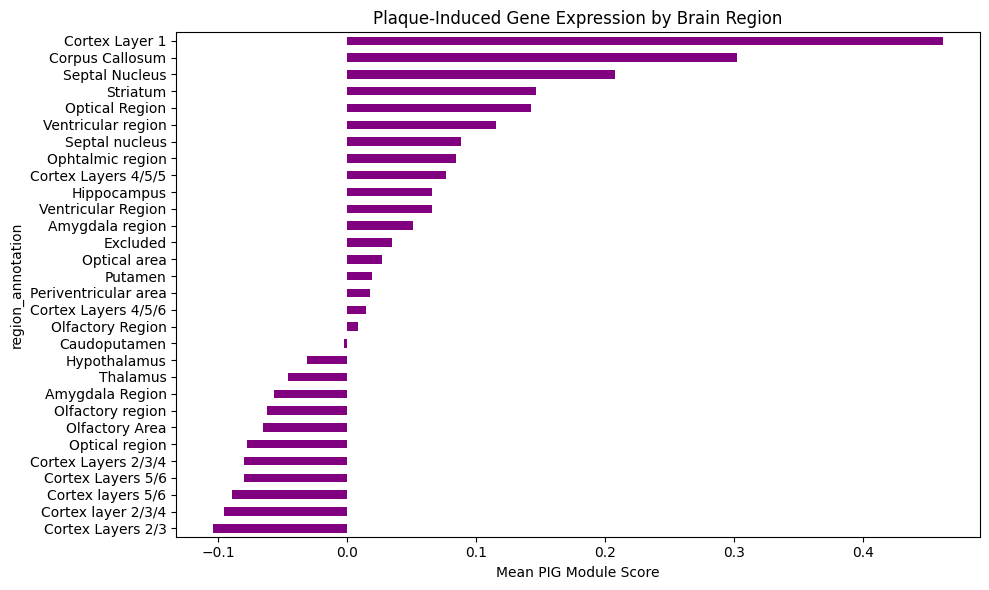

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
region_scores.plot(kind="barh", color="purple")
plt.xlabel("Mean PIG Module Score")
plt.title("Plaque-Induced Gene Expression by Brain Region")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()